<h1><center><b>Index</b></center></h1>

[Tutorial 1 : Fourier Checking Circuit](#Tutorial1)<br>
[Tutorial 2 : Grover's Algorithm](#Tutorial2)<br>


In [4]:
#!pip install --upgrade qiskit

In [2]:
import qiskit.quantum_info as qi
from qiskit import *
from qiskit.circuit.library import FourierChecking
from qiskit.visualization import plot_histogram

In [3]:
print(qiskit.__qiskit_version__)

{'qiskit-terra': '0.16.1', 'qiskit-aer': '0.7.2', 'qiskit-ignis': '0.5.1', 'qiskit-ibmq-provider': '0.11.1', 'qiskit-aqua': '0.8.1', 'qiskit': '0.23.2'}


## Tutorial 1 : Fourier Checking Circuit
<a id='Tutorial1'></a>

In [5]:
f = [1,-1,-1,-1]
g = [1, 1,-1,-1]

<b>f</b> & <b>g</b> are two functions. The Fourier Checking Circuit will tell us how correlated the Fourier Series of <b>g</b> is to <b>f</b>.
For a probability greater than 0.05, the Fourier transform of <b>g</b> is correlated to <b>f</b>.

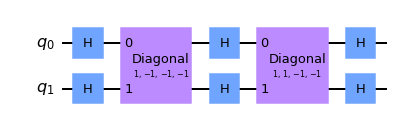

In [7]:
circ = FourierChecking(f=f, g=g)
circ.draw(output='mpl')

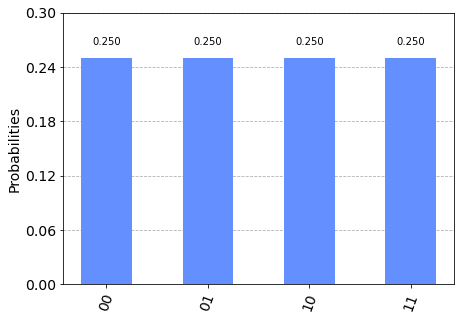

In [8]:
zero = qi.Statevector.from_label('00')
sv = zero.evolve(circ)
probs = sv.probabilities_dict()
plot_histogram(probs)

## Tutorial 2 : Grover's Algorithm
<a id='Tutorial2'></a>

In [10]:
my_list = [1,3,4,2,4,9,5,8,0,7,6]

In [13]:
def the_oracle(my_input):
    winner = 7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [14]:
for index, trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print("Winner found at index %i"%index)
        print("%i calls to the Oracle used"%(index+1))
        break
        

Winner found at index 9
10 calls to the Oracle used


In [15]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

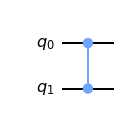

In [17]:
#Define oracle circuit
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw(output='mpl')

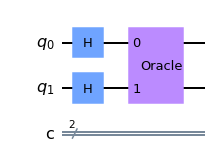

In [18]:
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.draw(output='mpl')

In [19]:
job = execute(grover_circ, backend)
result = job.result()

In [20]:
sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

The combination of the reflection operator & the oracle help to rotate the superposition vector (say) "s" towards the winning vector (say) "w"

In [21]:
reflection = QuantumCircuit(2, name = 'reflection')
reflection.h([0,1]) # to return states to 00 from superposition state
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()


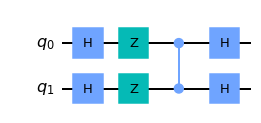

In [22]:
reflection.draw(output= 'mpl')

In [23]:
backend = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.append(reflection, [0,1])
grover_circ.measure([0,1],[0,1])

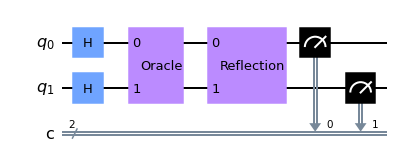

In [24]:
grover_circ.draw(output='mpl')

In [25]:
job = execute(grover_circ, backend, shots = 1)
result = job.result()
result.get_counts()

{'11': 1}